In [1]:
import numpy as np
import matplotlib.pyplot as plt
from prob_distribution import (
    RandomVariable,
    Gaussian
)
np.random.seed(1024)

## 1.1 Gaussian distribution

### 1.1.1 single variable

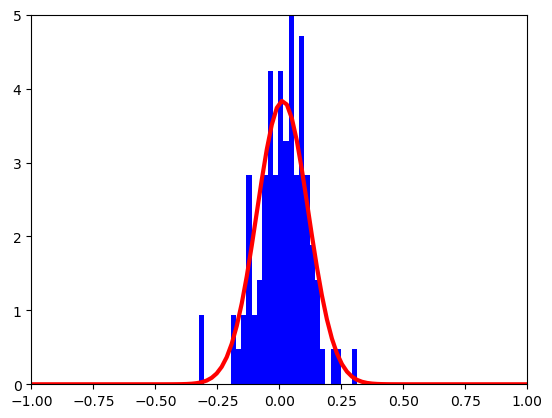

In [2]:
gaussian = Gaussian()
x_train = np.random.normal(0, 0.1, 100)
x = np.linspace(-1, 1, 100)
gaussian.fit(x_train)
y = gaussian.pdf(x)
plt.plot(x, y, c='r', linewidth=3)
plt.hist(x_train, bins=30, color='b', density=True)
plt.xlim(-1, 1)
plt.ylim(0, 5)
plt.show()

### 1.1.2 Bayesian inference for Gaussian

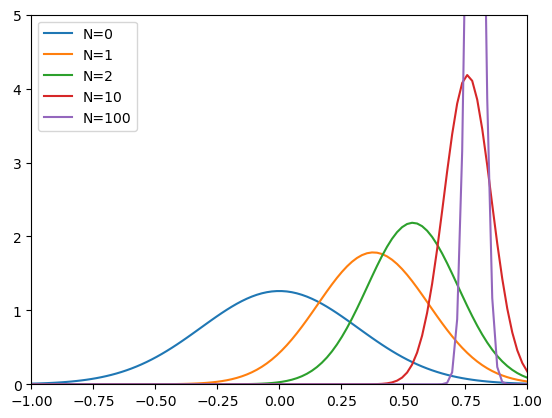

In [3]:
mean = Gaussian(0., 0.1)
model = Gaussian(mean, 0.1)
x = np.linspace(-1, 1, 100)
plt.plot(x, mean.pdf(x), label='N=0')
model.fit(np.random.normal(0.8, 0.1, 1))
plt.plot(x, model.mean.pdf(x), label='N=1')
model.fit(np.random.normal(0.8, 0.1, 1))
plt.plot(x, model.mean.pdf(x), label='N=2')
model.fit(np.random.normal(0.8, 0.1, 8))
plt.plot(x, model.mean.pdf(x), label='N=10')
model.fit(np.random.normal(0.8, 0.1, 90))
plt.plot(x, model.mean.pdf(x), label='N=100')
plt.legend()
plt.xlim(-1, 1)
plt.ylim(0, 5)
plt.show()

C:\Users\98311\PycharmProjects\Sunrise-ML\prob_distribution\gamma.py:14: RuntimeWarning: divide by zero encountered in power
  return self.b ** self.a * X ** (self.a-1) * np.exp(-self.b * X) / gamma(self.a)


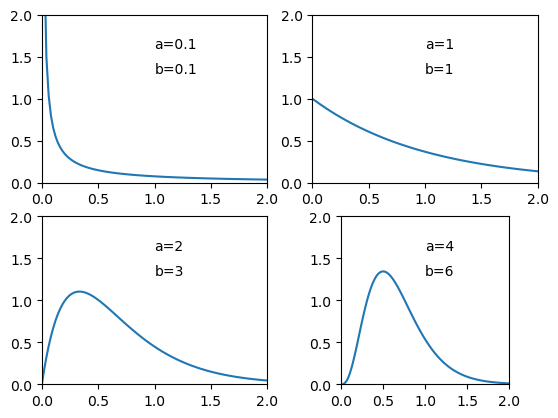

In [4]:
from prob_distribution import Gamma
x = np.linspace(0, 2, 100)
for i, (a, b) in enumerate([[0.1, 0.1], [1, 1], [2, 3], [4, 6]]):
    plt.subplot(2, 2, i + 1)
    plt.plot(x, Gamma(a, b).pdf(x))
    plt.annotate(f'a={a}', (1, 1.6))
    plt.annotate(f'b={b}', (1, 1.3))
    plt.xlim(0, 2)
    plt.ylim(0, 2)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

C:\Users\98311\PycharmProjects\Sunrise-ML\prob_distribution\gamma.py:14: RuntimeWarning: divide by zero encountered in power
  return self.b ** self.a * X ** (self.a-1) * np.exp(-self.b * X) / gamma(self.a)
C:\Users\98311\PycharmProjects\Sunrise-ML\prob_distribution\gamma.py:14: RuntimeWarning: divide by zero encountered in power
  return self.b ** self.a * X ** (self.a-1) * np.exp(-self.b * X) / gamma(self.a)


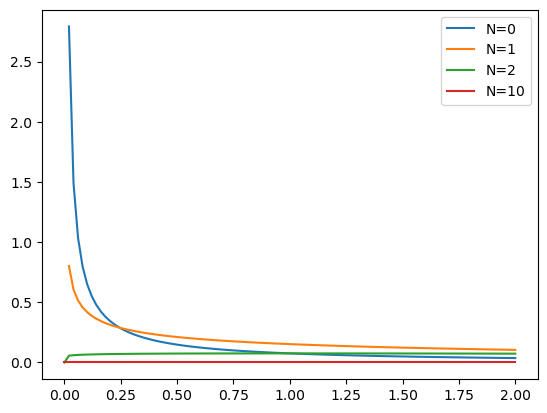

In [5]:
prec = Gamma(0.1, 0.1)
model = Gaussian(0.8, prec=prec)
plt.plot(x, prec.pdf(x), label='N=0')
model.fit(np.random.normal(0.8, 0.1, 1))
plt.plot(x, model.prec.pdf(x), label="N=1")
model.fit(np.random.normal(0.8, 0.1, 1))
plt.plot(x, model.prec.pdf(x), label="N=2")
model.fit(np.random.normal(0.8, 0.1, 8))
plt.plot(x, model.prec.pdf(x), label="N=10")
plt.legend()
plt.show()

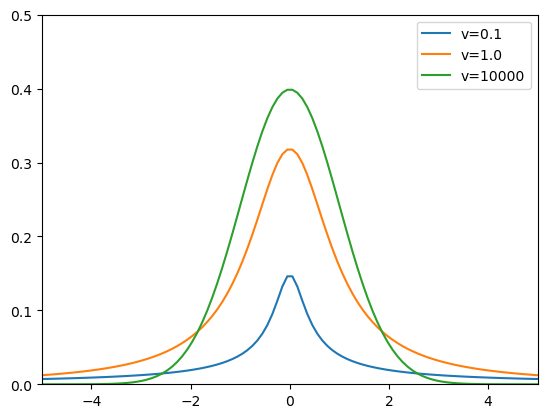

In [15]:
from scipy.stats import t
# u=0, lambda=1
x = np.linspace(-5, 5, 100)
for i , v in enumerate([0.1, 1.0, 10000]):
        plt.plot(x, t.pdf(x, v), label=f'v={v}')
plt.legend()
plt.xlim(-5, 5)
plt.ylim(0, 0.5)
plt.show()

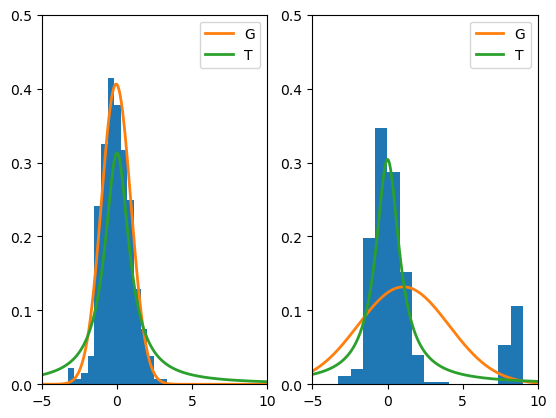

In [88]:
g = Gaussian()
x_train = np.random.normal(0., 1, 300)
g.fit(x_train)
v = t.fit(x_train)[-1]
x = np.linspace(-5, 10, 1000)
y = g.pdf(x)
plt.subplot(1, 2, 1)
plt.xlim(-5, 10)
plt.ylim(0, 0.5)
plt.hist(x_train, bins=15, density=True)
plt.plot(x, y, linewidth=2, label="G")
plt.plot(x, t.pdf(x, v), linewidth=2, label='T')
plt.legend()
plt.subplot(1, 2, 2)
plt.xlim(-5, 10)
plt.ylim(0, 0.5)
x_train = np.concatenate([x_train, [8., 8.5, 9.] * 15])
g.fit(x_train)
v = t.fit(x_train)[-1]
plt.hist(x_train, bins=15, density=True)
plt.plot(x, g.pdf(x), linewidth=2, label="G")
plt.plot(x, t.pdf(x, v), linewidth=2, label='T')
plt.legend()
plt.show()

### 1.1.3 Laplace central limit theorem

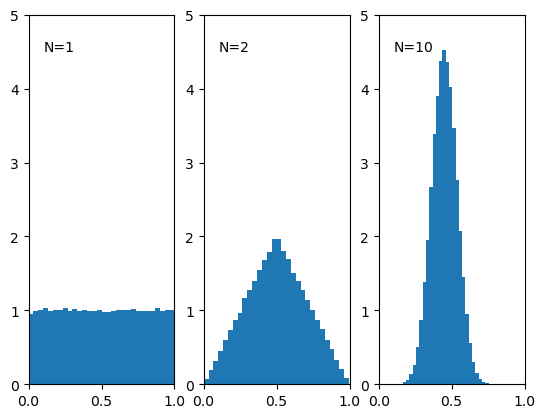

In [36]:
x_train = np.random.uniform(0., 1., 100000)
plt.subplot(1, 3, 1)
plt.xlim(0, 1)
plt.ylim(0, 5)
plt.hist(x_train, bins=30, density=True)
plt.annotate('N=1', (0.1, 4.5))
plt.subplot(1, 3, 2)
plt.hist((x_train + np.random.uniform(0., 1., 100000)) * 0.5, bins=30, density=True)
plt.annotate('N=2', (0.1, 4.5))
plt.xlim(0, 1)
plt.ylim(0, 5)
plt.subplot(1, 3, 3)
plt.xlim(0, 1)
plt.ylim(0, 5)
for _ in range(8):
    x_train += np.random.uniform(0., 1., 100000)
plt.hist(x_train * 0.1, bins=30, density=True)
plt.annotate('N=10', (0.1, 4.5))
plt.show()

### 1.1.4 Multi-Gaussian

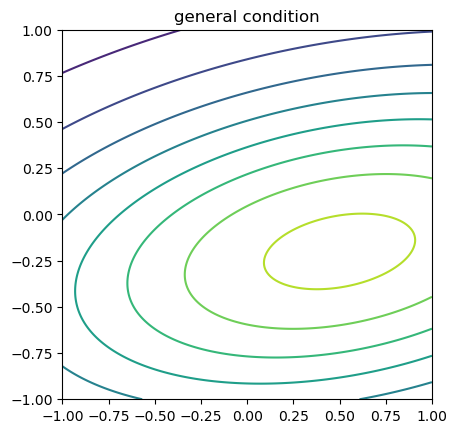

In [46]:
from scipy.stats import multivariate_normal
x, y = np.meshgrid(np.linspace(-1,1,200), np.linspace(-1, 1, 200))
mg = multivariate_normal([0.5, -0.2], [[2.0, 0.3], [0.3, 0.5]])
pos = np.dstack((x, y))
plt.contour(x, y, mg.pdf(pos))
plt.gca().set_aspect('equal')
plt.title("general condition")
plt.show()

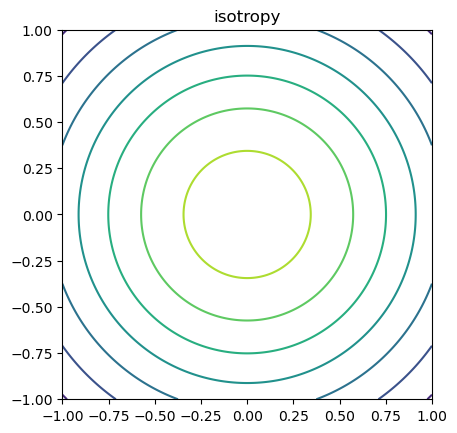

In [47]:
mg = multivariate_normal([0., 0.], [[1.0, 0.], [0., 1.0]])
plt.contour(x, y, mg.pdf(pos))
plt.gca().set_aspect('equal')
plt.title("isotropy")
plt.show()

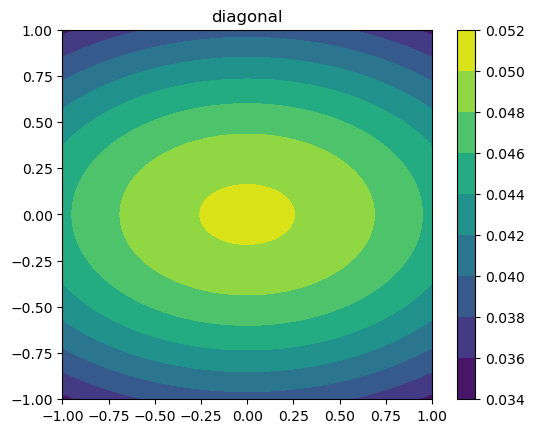

In [60]:
mg = multivariate_normal([0., 0.], [[5.0, 0.], [0., 2.0]])
pcm = plt.contourf(x, y, mg.pdf(pos))
plt.colorbar(pcm)
plt.gca().set_aspect('equal')
plt.title("diagonal")
plt.show()